In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("data.csv")
data = data.drop(data[data.MEDV==50.0000].index)
data = data.drop(data[data.MEDV<=8.0000].index)
##data = data.drop(data[data.RM>=8.0000].index)
data = data.drop(data[data.RM<=4.0000].index)


data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,477.000000,477.000000,477.000000,477.000000,477.000000,472.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000
mean,3.139165,11.415094,10.902516,0.060797,0.550810,6.268100,67.535220,3.895597,9.161426,400.876310,18.474423,357.849644,12.585115,21.967715
std,7.732128,23.079549,6.778278,0.239208,0.116206,0.630821,28.156628,2.105249,8.492529,164.607157,2.120680,89.850937,6.749619,7.622942
min,0.006320,0.000000,0.740000,0.000000,0.385000,4.138000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.980000,8.100000
25%,0.079780,0.000000,5.130000,0.000000,0.448000,5.888000,42.800000,2.170500,4.000000,279.000000,17.400000,376.140000,7.220000,17.200000
50%,0.228760,0.000000,8.560000,0.000000,0.524000,6.194000,75.000000,3.370000,5.000000,329.000000,19.000000,391.930000,11.450000,21.100000
75%,2.733970,12.500000,18.100000,0.000000,0.624000,6.593500,93.400000,5.287300,8.000000,469.000000,20.200000,396.280000,16.650000,24.700000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,48.800000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 0 to 505
Data columns (total 14 columns):
CRIM       477 non-null float64
ZN         477 non-null float64
INDUS      477 non-null float64
CHAS       477 non-null int64
NOX        477 non-null float64
RM         472 non-null float64
AGE        477 non-null float64
DIS        477 non-null float64
RAD        477 non-null int64
TAX        477 non-null int64
PTRATIO    477 non-null float64
B          477 non-null float64
LSTAT      477 non-null float64
MEDV       477 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.9 KB


In [5]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.196037,0.407840,-0.056873,0.410234,-0.177032,0.338931,-0.370890,0.627758,0.585678,0.277878,-0.413200,0.411871,-0.408650
ZN,-0.196037,1.000000,-0.524006,-0.057475,-0.508014,0.309136,-0.559749,0.671722,-0.299642,-0.293017,-0.375731,0.173633,-0.425528,0.402934
INDUS,0.407840,-0.524006,1.000000,0.044477,0.760898,-0.403002,0.628452,-0.702131,0.588444,0.705982,0.373749,-0.363316,0.632264,-0.587974
CHAS,-0.056873,-0.057475,0.044477,1.000000,0.094879,0.038322,0.078970,-0.086392,-0.023456,-0.059139,-0.112472,0.037967,0.005884,0.067210
NOX,0.410234,-0.508014,0.760898,0.094879,1.000000,-0.305025,0.721300,-0.761028,0.595908,0.654075,0.168903,-0.385186,0.604771,-0.508361
RM,-0.177032,0.309136,-0.403002,0.038322,-0.305025,1.000000,-0.250724,0.219787,-0.156876,-0.247919,-0.283950,0.106949,-0.637070,0.725203
AGE,0.338931,-0.559749,0.628452,0.078970,0.721300,-0.250724,1.000000,-0.736336,0.434310,0.481018,0.253111,-0.272428,0.637380,-0.478223
DIS,-0.370890,0.671722,-0.702131,-0.086392,-0.761028,0.219787,-0.736336,1.000000,-0.472377,-0.511888,-0.229297,0.295451,-0.524688,0.344135
RAD,0.627758,-0.299642,0.588444,-0.023456,0.595908,-0.156876,0.434310,-0.472377,1.000000,0.909069,0.443204,-0.451217,0.483082,-0.449965
TAX,0.585678,-0.293017,0.705982,-0.059139,0.654075,-0.247919,0.481018,-0.511888,0.909069,1.000000,0.436966,-0.448791,0.541544,-0.548164


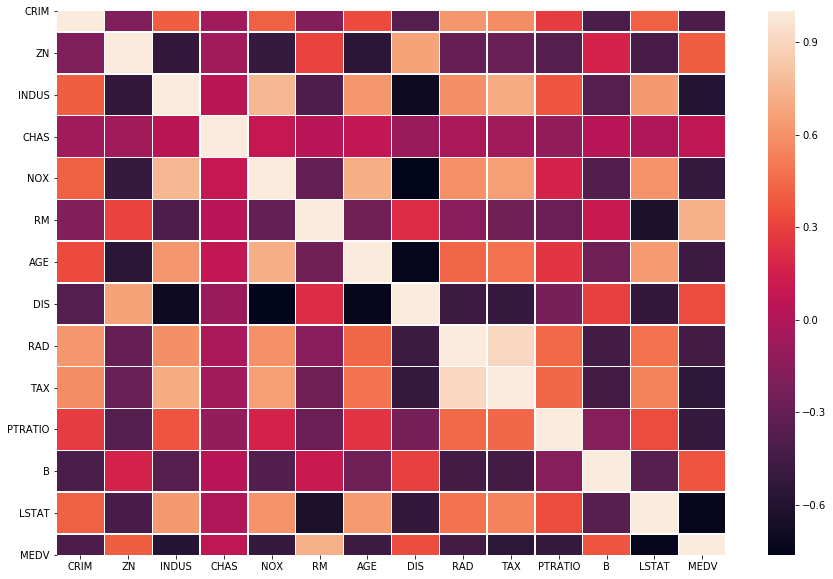

In [6]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),linewidths=0.4)

In [7]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
data.count()

CRIM       477
ZN         477
INDUS      477
CHAS       477
NOX        477
RM         472
AGE        477
DIS        477
RAD        477
TAX        477
PTRATIO    477
B          477
LSTAT      477
MEDV       477
dtype: int64

In [9]:
data['RM'].head(10)

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
5    6.430
6    6.012
7    6.172
8    5.631
9    6.004
Name: RM, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019321949978>,
      dtype=object)

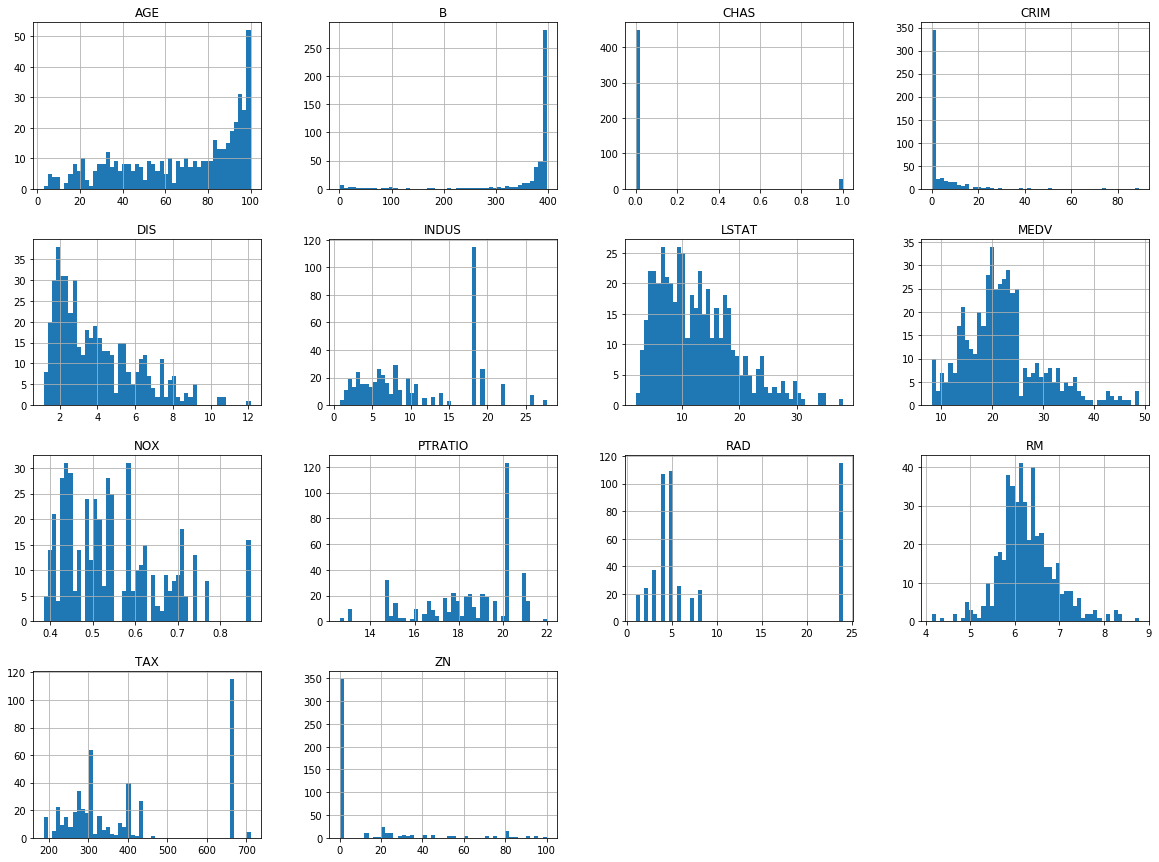

In [10]:
data.hist(bins=50,figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019323337940>,
      dtype=object)

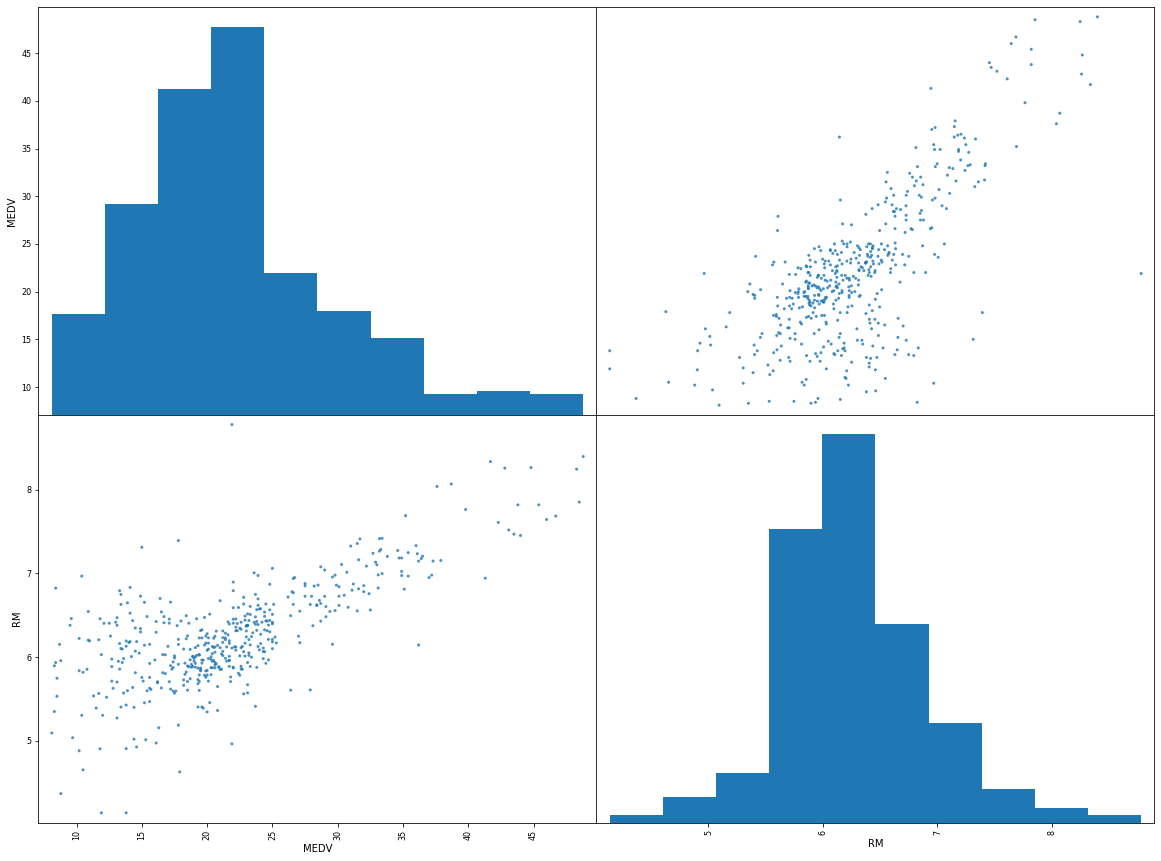

In [11]:
from pandas.plotting import scatter_matrix
df = data[["MEDV","RM"]]
scatter_matrix(df,alpha=0.8,figsize=(20,15))

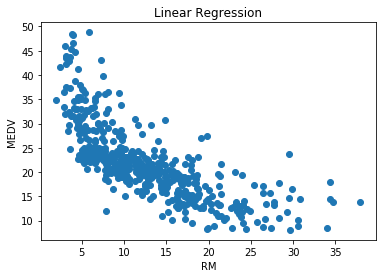

In [38]:
plt.scatter(data.LSTAT,data.MEDV)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Linear Regression')
plt.show()

# CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT	

In [13]:
from sklearn import preprocessing

In [14]:
data = data.fillna(data.RM.median())

In [15]:

data.iloc[:,5].values
data.mean(axis=0)

CRIM         3.139165
ZN          11.415094
INDUS       10.902516
CHAS         0.060797
NOX          0.550810
RM           6.267323
AGE         67.535220
DIS          3.895597
RAD          9.161426
TAX        400.876310
PTRATIO     18.474423
B          357.849644
LSTAT       12.585115
MEDV        21.967715
dtype: float64

In [50]:
X = data.iloc[:,5].values
Y = data.iloc[:,13].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2, random_state=34)
train_y

array([[19.3],
       [16.2],
       [10.2],
       [23. ],
       [20.1],
       [17.7],
       [21.5],
       [13.9],
       [17.5],
       [29.4],
       [17.3],
       [13.4],
       [21.7],
       [13.6],
       [14.9],
       [42.3],
       [12. ],
       [46. ],
       [28.4],
       [13.5],
       [23.5],
       [34.7],
       [23.1],
       [28.2],
       [33. ],
       [29.8],
       [18.7],
       [43.8],
       [19.4],
       [21.9],
       [16.4],
       [14.6],
       [24.5],
       [34.9],
       [21.2],
       [20.1],
       [22.5],
       [20.6],
       [22. ],
       [23.8],
       [17.1],
       [27.5],
       [24.4],
       [21.5],
       [16.6],
       [22.6],
       [25. ],
       [13.2],
       [21.2],
       [25. ],
       [21.1],
       [43.5],
       [14.1],
       [17.1],
       [28.6],
       [37.9],
       [20.1],
       [13.3],
       [15. ],
       [43.1],
       [33.8],
       [23.3],
       [48.5],
       [29.6],
       [18.4],
       [13.8],
       [14

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression()
model.fit(train_x,train_y)
x=model.predict(test_x)
x

array([[25.03177843],
       [31.20642033],
       [16.08378043],
       [30.4563932 ],
       [18.38618927],
       [20.61882815],
       [ 7.66777841],
       [21.63049264],
       [20.35719078],
       [23.16543187],
       [20.07811092],
       [25.0841059 ],
       [20.47056697],
       [15.83958555],
       [15.87447053],
       [23.21775934],
       [23.13926813],
       [17.51406471],
       [24.34280003],
       [17.1303299 ],
       [18.98795522],
       [17.80186581],
       [17.1303299 ],
       [19.31064131],
       [25.34574327],
       [21.32524904],
       [32.01749617],
       [16.18843537],
       [20.75836808],
       [18.72631785],
       [31.78202254],
       [28.47667045],
       [18.53445045],
       [26.71497883],
       [28.1801481 ],
       [28.19759059],
       [40.54687438],
       [22.94740073],
       [18.93562774],
       [13.91219027],
       [21.33397029],
       [20.6101069 ],
       [14.43546501],
       [24.91840224],
       [19.99089846],
       [18

In [55]:
from sklearn.metrics import r2_score,mean_squared_error

In [56]:
error = mean_squared_error(test_y,x)

In [57]:
error

24.312163316089087

In [58]:
score = r2_score(test_y,x)

In [59]:
score

0.6020145006729597

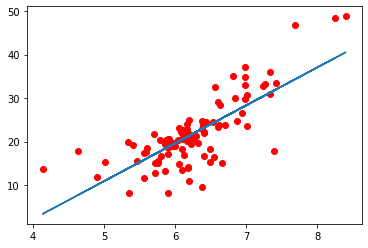

In [60]:
plt.scatter(test_x,test_y,color="red")
plt.plot(test_x,x)